# Final Project

## Introduction
Music collaborations form complex networks in which artists connect through joint appearances on songs, reflecting creative partnerships, genre communities, and industry dynamics. In this project, we model the music collaboration landscape as a graph, where nodes represent artists and edges represent collaborative relationships derived from shared song credits. Using the MusicOSet dataset, we construct a weighted artist–artist network in which edge weights correspond to the number of songs two artists have created together. This representation enables the analysis of structural properties such as degree distribution, collaboration hubs, and tightly connected subgroups. To improve interpretability, the network is filtered to focus on artists with multiple collaborations while preserving their local neighborhood context. Through visualization and network analysis, the project aims to highlight key artists, recurring collaborations, and the underlying structure of contemporary music collaboration networks.

## Imports

In [37]:
import pandas as pd
import ast
import networkx as nx
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import linregress

## Data

In [ ]:
len(G.nodes())

1661

Music collaborations form complex networks in which artists connect through joint appearances on songs, reflecting creative partnerships, genre communities, and industry dynamics. In this project, we model the music collaboration landscape as a graph, where nodes represent artists and edges represent collaborative relationships derived from shared song credits. Using the MusicOSet dataset, we construct a weighted artist–artist network in which edge weights correspond to the number of songs two artists have created together. This representation enables the analysis of structural properties such as degree distribution, collaboration hubs, and tightly connected subgroups. To improve interpretability, the network is filtered to focus on artists with multiple collaborations while preserving their local neighborhood context. Through visualization and network analysis, the project aims to highlight key artists, recurring collaborations, and the underlying structure of contemporary music collaboration networks.

In [10]:
df_artists = pd.read_csv("./data/musicoset_metadata/artists.csv", sep=None)

/var/folders/p_/x3lbpksn1p935rvst0bz617r0000gn/T/ipykernel_30034/2699947190.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_artists = pd.read_csv("./data/musicoset_metadata/artists.csv", sep=None)


In [22]:
df_artists.head()

,artist_id,name,followers,popularity,artist_type,main_genre,genres,image_url
0,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242.0,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
1,26VFTg2z8YR0cCuwLzESi2,Halsey,7368242.0,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
2,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709.0,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
3,246dkjvS1zLTtiykXe5h60,Post Malone,16737002.0,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
4,1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032.0,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...


In [25]:
df_artists.columns

Index(['artist_id', 'name', 'followers', 'popularity', 'artist_type',
       'main_genre', 'genres', 'image_url'],
      dtype='object')

In [4]:
df_songs = pd.read_csv(
    "./data/musicoset_metadata/songs.csv",
    sep=None,
    engine="python"
)

In [23]:
df_songs.head()

,song_id,song_name,billboard,artists,popularity,explicit,song_type,artists_dict
0,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","('Thank U, Next', 'Ariana Grande')",{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},86,True,Solo,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'}
1,5p7ujcrUXASCNwRaWNHR1C,Without Me,"('Without Me', 'Halsey')",{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},87,True,Solo,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'}
2,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,"('Sicko Mode', 'Travis Scott')",{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},85,True,Solo,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'}
3,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,('Sunflower (Spider-Man: Into The Spider-Verse...,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...",92,False,Collaboration,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN..."
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,"('High Hopes', 'Panic! At The Disco')",{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},86,False,Solo,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'}


In [6]:
df_songs["artists_dict"] = df_songs["artists"].apply(ast.literal_eval)

In [24]:
df_songs.columns

Index(['song_id', 'song_name', 'billboard', 'artists', 'popularity',
       'explicit', 'song_type', 'artists_dict'],
      dtype='object')

In [7]:
df_songs[["song_name", "artists_dict", "song_type"]].head()

,song_name,artists_dict,song_type
0,"thank u, next",{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},Solo
1,Without Me,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Solo
2,SICKO MODE,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},Solo
3,Sunflower - Spider-Man: Into the Spider-Verse,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...",Collaboration
4,High Hopes,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},Solo


## Graph construction

In [28]:
edge_counter = Counter()
artist_names = {}
for _, row in df_songs.iterrows():
    artists = row["artists_dict"]
    artist_ids = list(artists.keys())

    # store names
    for aid, name in artists.items():
        artist_names[aid] = name

    # collaborations
    if len(artist_ids) > 1:
        for a, b in combinations(sorted(artist_ids), 2):
            edge_counter[(a, b)] += 1

# build graph
G_full = nx.Graph()

# add nodes
for aid, name in artist_names.items():
    G_full.add_node(aid, name=name)

# add weighted edges
for (a, b), w in edge_counter.items():
    G_full.add_edge(a, b, weight=w)

print("Artists:", G_full.number_of_nodes())
print("Collaborations:", G_full.number_of_edges())

Artists: 6025
Collaborations: 2186


In [8]:
edge_counter = Counter()
artist_names = {}
df_collab = df_songs[df_songs["song_type"] != "Solo"]
for _, row in df_collab.iterrows():
    artists = row["artists_dict"]
    artist_ids = list(artists.keys())

    # store names
    for aid, name in artists.items():
        artist_names[aid] = name

    # collaborations
    if len(artist_ids) > 1:
        for a, b in combinations(sorted(artist_ids), 2):
            edge_counter[(a, b)] += 1

# build graph
G = nx.Graph()

# add nodes
for aid, name in artist_names.items():
    G.add_node(aid, name=name)

# add weighted edges
for (a, b), w in edge_counter.items():
    G.add_edge(a, b, weight=w)

print("Artists:", G.number_of_nodes())
print("Collaborations:", G.number_of_edges())


Artists: 1661
Collaborations: 2186


In [12]:
import matplotlib as mpl
mpl.rcParams["font.size"] = 16

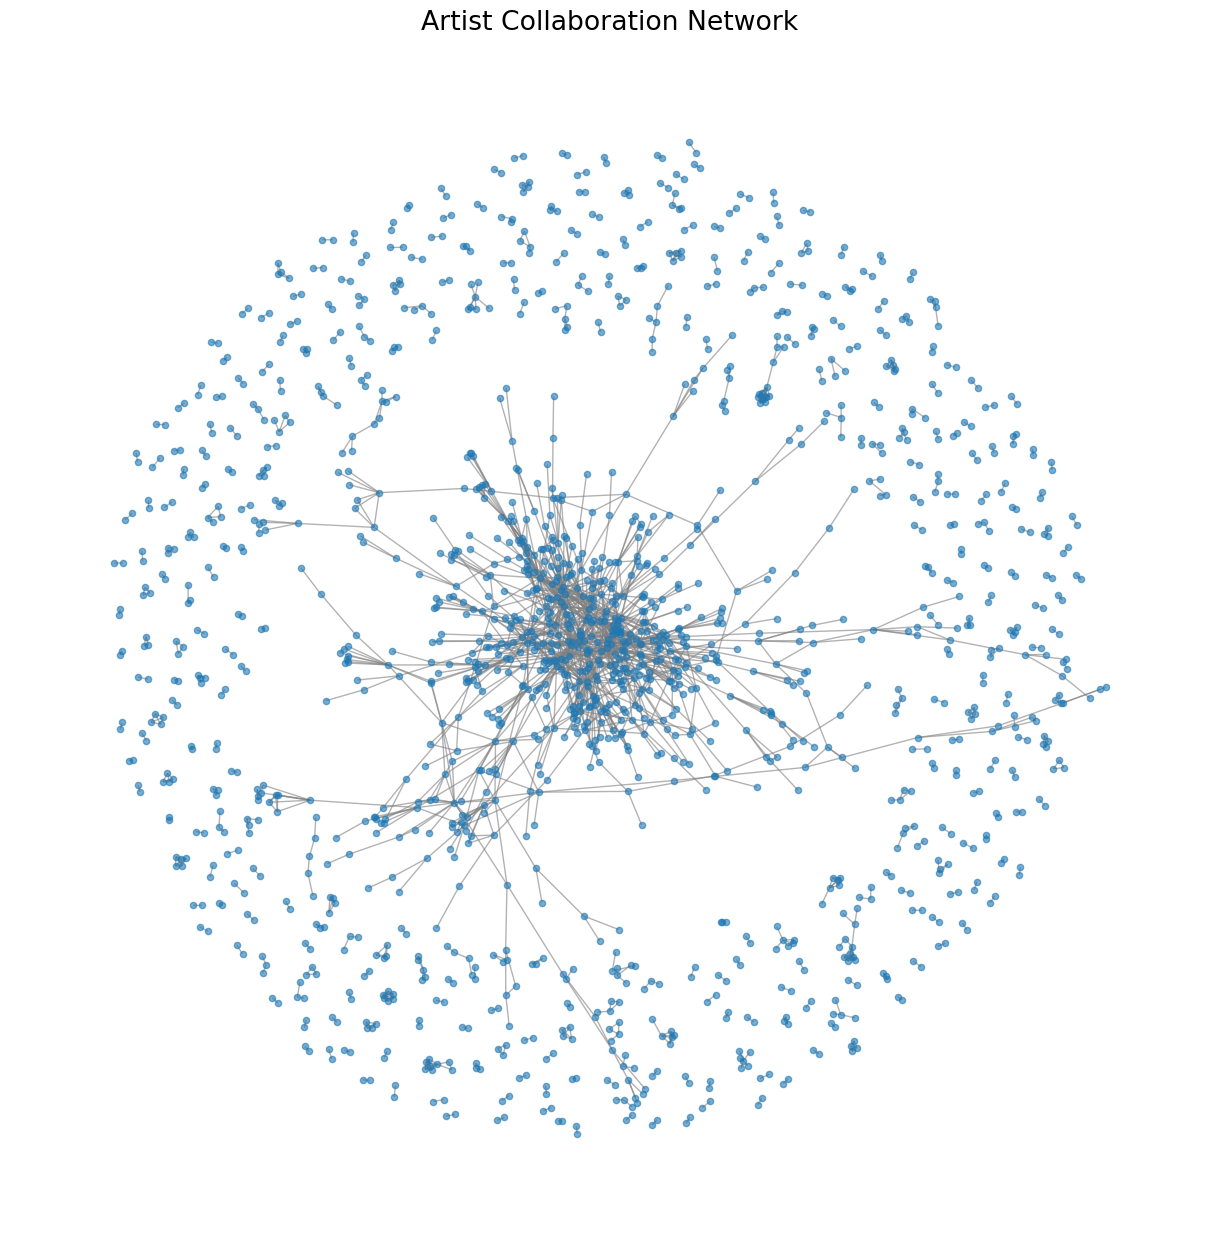

In [13]:
plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G, seed=42, k=0.15)

nx.draw(
    G,
    pos,
    node_size=20,
    alpha=0.6,
    edge_color="gray",
    with_labels=False
)

plt.title("Artist Collaboration Network")
plt.show()

In [16]:
# keep nodes with degree > 1
nodes_gt1 = [n for n, d in G.degree() if d > 2]

G_deg = G.subgraph(nodes_gt1).copy()

print("Nodes:", G_deg.number_of_nodes())
print("Edges:", G_deg.number_of_edges())

Nodes: 476
Edges: 1177


In [26]:
# 1. core nodes
core_nodes = {n for n, d in G.degree() if d > 2}

# 2. add all neighbors of core nodes
expanded_nodes = set(core_nodes)
for n in core_nodes:
    expanded_nodes.update(G.neighbors(n))

# 3. induced subgraph
G_expanded = G.subgraph(expanded_nodes).copy()

print("Core nodes:", len(core_nodes))
print("Expanded nodes:", G_expanded.number_of_nodes())
print("Edges:", G_expanded.number_of_edges())


Core nodes: 476
Expanded nodes: 906
Edges: 1722


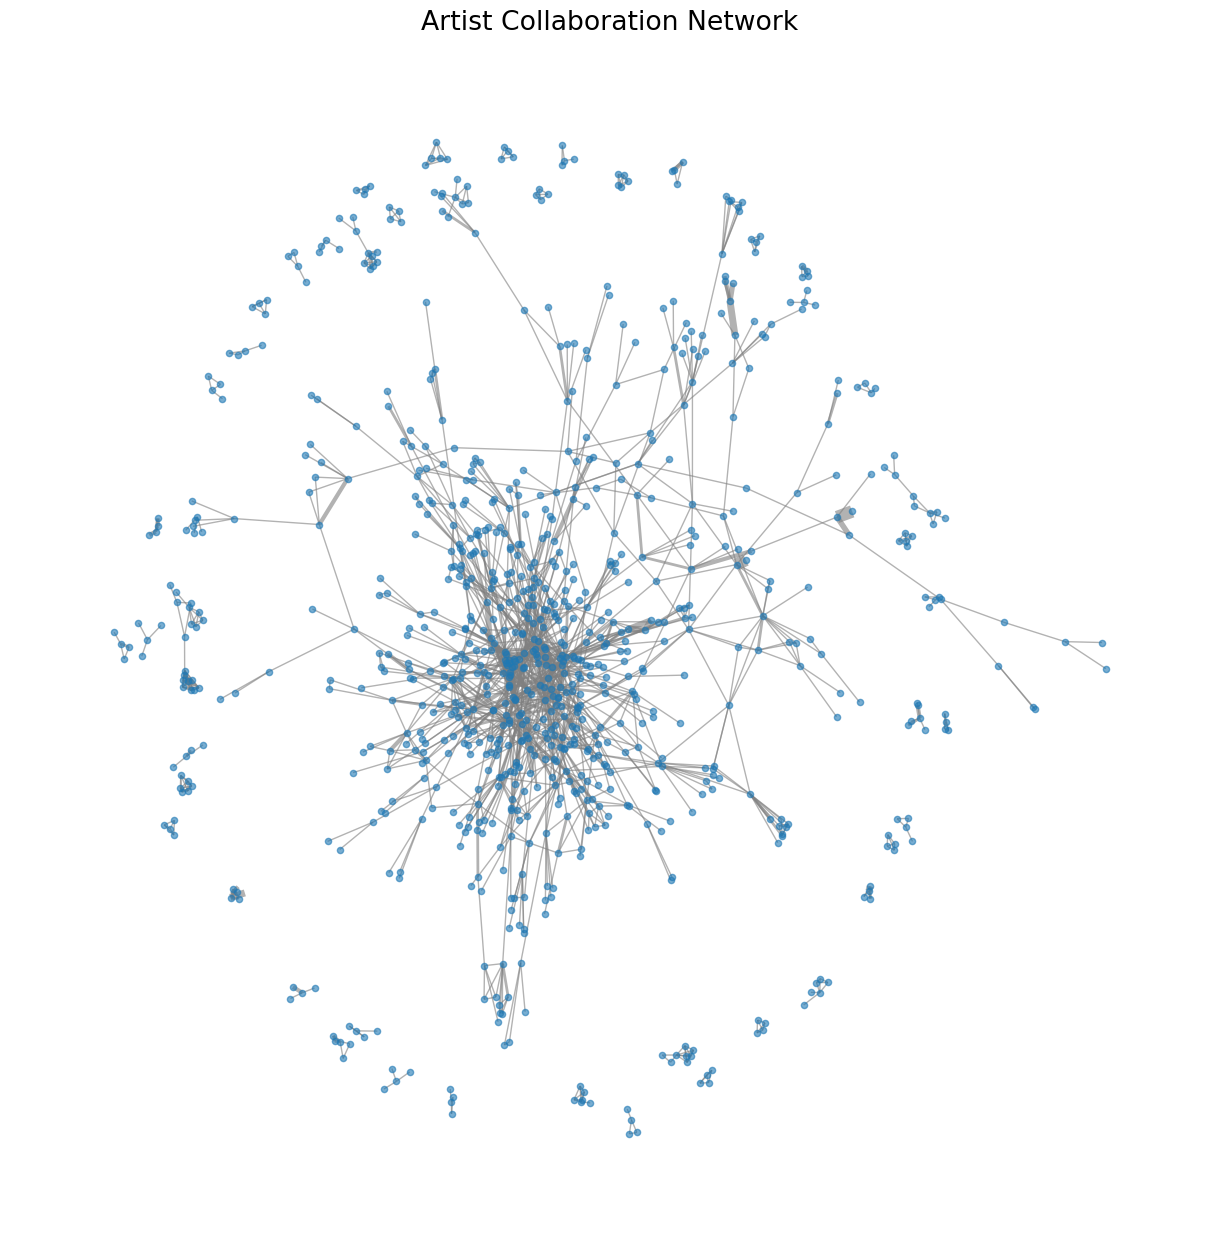

In [27]:
plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G_expanded, seed=42, k=0.15)

nx.draw(
    G_expanded,
    pos,
    node_size=20,
    alpha=0.6,
    edge_color="gray",
    with_labels=False,
    width=[G_expanded[u][v]["weight"] for u, v in G_expanded.edges()]

)

plt.title("Artist Collaboration Network")
plt.show()

The artist collaboration network exhibits a highly heterogeneous structure with a dense central core and numerous small peripheral components. The central region consists of highly connected artists who collaborate frequently, forming a tightly knit core that acts as the backbone of the network. Surrounding this core are many sparsely connected nodes and small clusters, representing artists with only one or two collaborations, often tied to a single project or collaborator. This core–periphery structure is characteristic of collaboration networks, where a small number of highly active artists function as hubs, while the majority of artists participate in collaborations more sporadically. The presence of many small disconnected components highlights the prevalence of isolated or niche collaborations that do not integrate into the broader collaboration ecosystem.

## Properties of this network

In [29]:
degrees = [d for _, d in G.degree()]


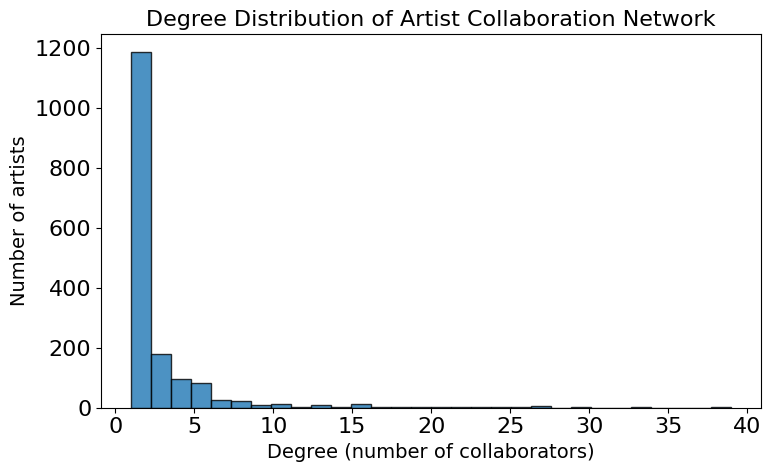

In [31]:
plt.figure(figsize=(8, 5))

plt.hist(
    degrees,
    bins=30,
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Degree (number of collaborators)", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Degree Distribution of Artist Collaboration Network", fontsize=16)

plt.tight_layout()
plt.show()

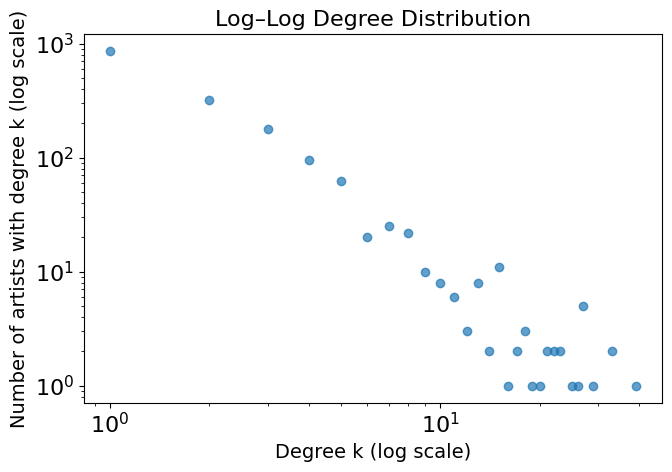

In [33]:
degree_counts = Counter(degrees)

k = np.array(list(degree_counts.keys()))
pk = np.array(list(degree_counts.values()))

plt.figure(figsize=(7, 5))

plt.scatter(k, pk, alpha=0.7)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Degree k (log scale)", fontsize=14)
plt.ylabel("Number of artists with degree k (log scale)", fontsize=14)
plt.title("Log–Log Degree Distribution", fontsize=16)

plt.tight_layout()
plt.show()

In [34]:
def degree_distribution(G):
    degrees = [d for _, d in G.degree()]
    return degrees

In [38]:
def estimate_alpha(G):
    degrees = degree_distribution(G)
    hist, bins = np.histogram(degrees, bins=50, density=True)
    x = (bins[:-1] + bins[1:]) / 2

    mask = (hist > 1e-6)
    log_x = np.log(x[mask])
    log_y = np.log(hist[mask])
    slope, intercept, *_ = linregress(log_x, log_y)
    alpha = -slope

    print("Estimated alpha:", alpha)
    return alpha

In [39]:
estimate_alpha(G)

Estimated alpha: 2.1442070147622307


np.float64(2.1442070147622307)

Since the estimated exponent satisfies 2 < a < 3, the network is scale-free in the sense that it lacks a characteristic degree scale.

The log–log degree distribution of the artist collaboration network exhibits a heavy-tailed structure spanning several orders of magnitude. Most artists collaborate with only a few others, while a small number of artists act as highly connected hubs. The approximately linear behavior observed in the intermediate degree range is consistent with power-law–like scaling. The estimated exponent a≈2.14 lies within the range 2<a<3, characteristic of scale-free networks, indicating the absence of a characteristic degree scale and suggesting the presence of preferential attachment (Matthew effect) mechanisms. Deviations observed for large degrees are attributed to finite-size effects.

In [41]:
import powerlaw
degrees = degree_distribution(G)
fit = powerlaw.Fit(degrees, discrete=True)

Calculating best minimal value for power law fit


Fitting xmin: 100%|██████████| 27/27 [00:00<00:00, 964.39it/s]


In [42]:
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin

print("alpha =", alpha)
print("xmin =", xmin)


alpha = 2.5502197265624993
xmin = 3.0


/Users/danieltytkowski/.conda/envs/nlp/lib/python3.11/site-packages/powerlaw/distributions.py:743: OptimizeWarning: Initial guess is not within the specified bounds
  result = scipy.optimize.minimize(fit_function,


In [43]:
R, p = fit.distribution_compare("power_law", "lognormal")
print("R =", R)
print("p =", p)

R = -3.126612515318689
p = 0.07808631385153035


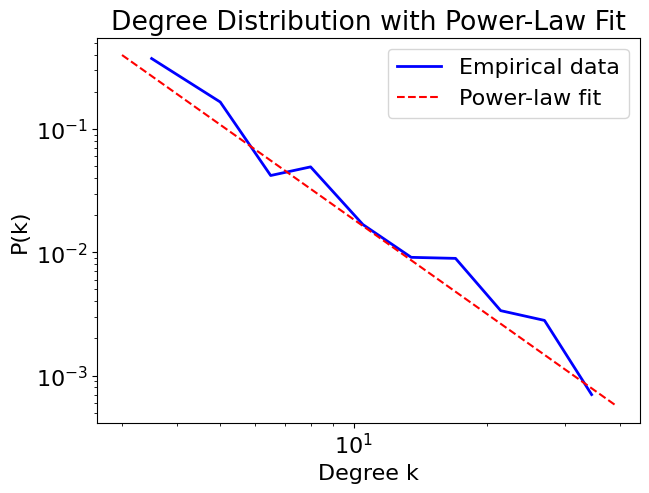

In [45]:
plt.figure(figsize=(7,5))

fit.plot_pdf(color='b', linewidth=2, label='Empirical data')
fit.power_law.plot_pdf(color='r', linestyle='--', label='Power-law fit')

plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.legend()
plt.title("Degree Distribution with Power-Law Fit")
plt.show()


The degree distribution of the artist collaboration network exhibits heavy-tailed behavior, with most artists having few collaborators and a small number acting as hubs. Although the distribution appears approximately linear on a log–log scale over an intermediate range of degrees, statistical analysis using the Clauset–Shalizi–Newman framework indicates that a pure power-law model is disfavored. A likelihood-ratio test comparing power-law and lognormal models yields R = −3.13 with p = 0.078, indicating that the lognormal distribution provides a statistically better fit. These results suggest that the network is heavy-tailed but not strictly scale-free.

In [56]:
nodes_deg2 = [n for n, d in G.degree() if d >= 2]
avg_clustering = nx.average_clustering(G_deg, nodes=nodes_deg2)

print("Average clustering coefficient:", avg_clustering)

Average clustering coefficient: 0.5735081848600128


The expanded collaboration network exhibits a high average clustering coefficient (⟨C⟩ ≈ 0.57), indicating strong triadic closure and the presence of tightly connected collaboration groups, a hallmark of social and creative networks.

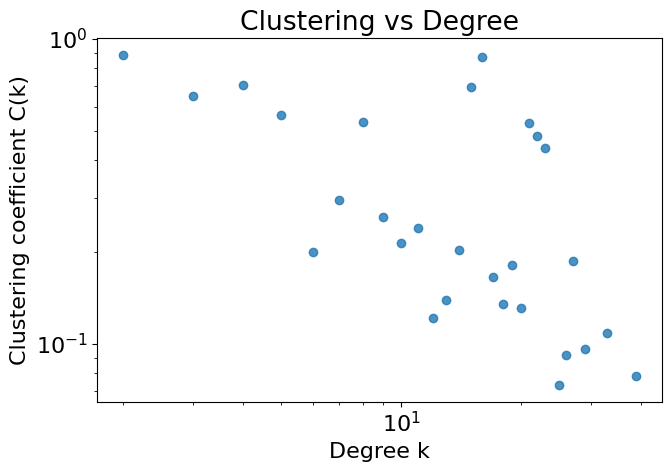

In [57]:
from collections import defaultdict
# clustering per node
clustering = nx.clustering(G_expanded)
degree = dict(G_expanded.degree())

# group clustering by degree
ck = defaultdict(list)
for n in G_expanded.nodes():
    if degree[n] >= 2:
        ck[degree[n]].append(clustering[n])

# compute average C(k)
k_vals = np.array(sorted(ck.keys()))
Ck = np.array([np.mean(ck[k]) for k in k_vals])

# plot
plt.figure(figsize=(7, 5))
plt.scatter(k_vals, Ck, alpha=0.8)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Degree k")
plt.ylabel("Clustering coefficient C(k)")
plt.title("Clustering vs Degree")
plt.tight_layout()
plt.show()

The log–log plot of the clustering coefficient as a function of degree reveals a decreasing trend, indicating hierarchical structure. Low-degree artists are embedded in tightly connected collaboration clusters, while high-degree artists exhibit lower clustering, consistent with their role as bridges between otherwise separate collaboration communities.

## Most influential artists

In [58]:
pr = nx.pagerank(G, weight="weight")

In [60]:
top_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]

for artist_id, score in top_pr:
    print(
        G.nodes[artist_id].get("name", artist_id),
        "→ PageRank:",
        round(score, 4)
    )


Lil Wayne → PageRank: 0.0058
Kanye West → PageRank: 0.0043
Ludacris → PageRank: 0.0037
JAY Z → PageRank: 0.0036
T-Pain → PageRank: 0.0033
Snoop Dogg → PageRank: 0.0033
R. Kelly → PageRank: 0.0033
Akon → PageRank: 0.0032
Diddy → PageRank: 0.0031
Drake → PageRank: 0.0026


In [61]:
df_pr = pd.DataFrame({
    "artist": [G.nodes[n].get("name", n) for n in pr],
    "pagerank": list(pr.values()),
    "degree": [G.degree(n, weight="weight") for n in pr]
})

df_pr.sort_values("pagerank", ascending=False).head(10)


,artist,pagerank,degree
11,Lil Wayne,0.005817,61
65,Kanye West,0.004337,46
196,Ludacris,0.003707,38
82,JAY Z,0.003629,37
128,T-Pain,0.003324,34
87,Snoop Dogg,0.003315,32
83,R. Kelly,0.003307,29
127,Akon,0.003186,31
866,Diddy,0.003102,30
74,Drake,0.002584,28


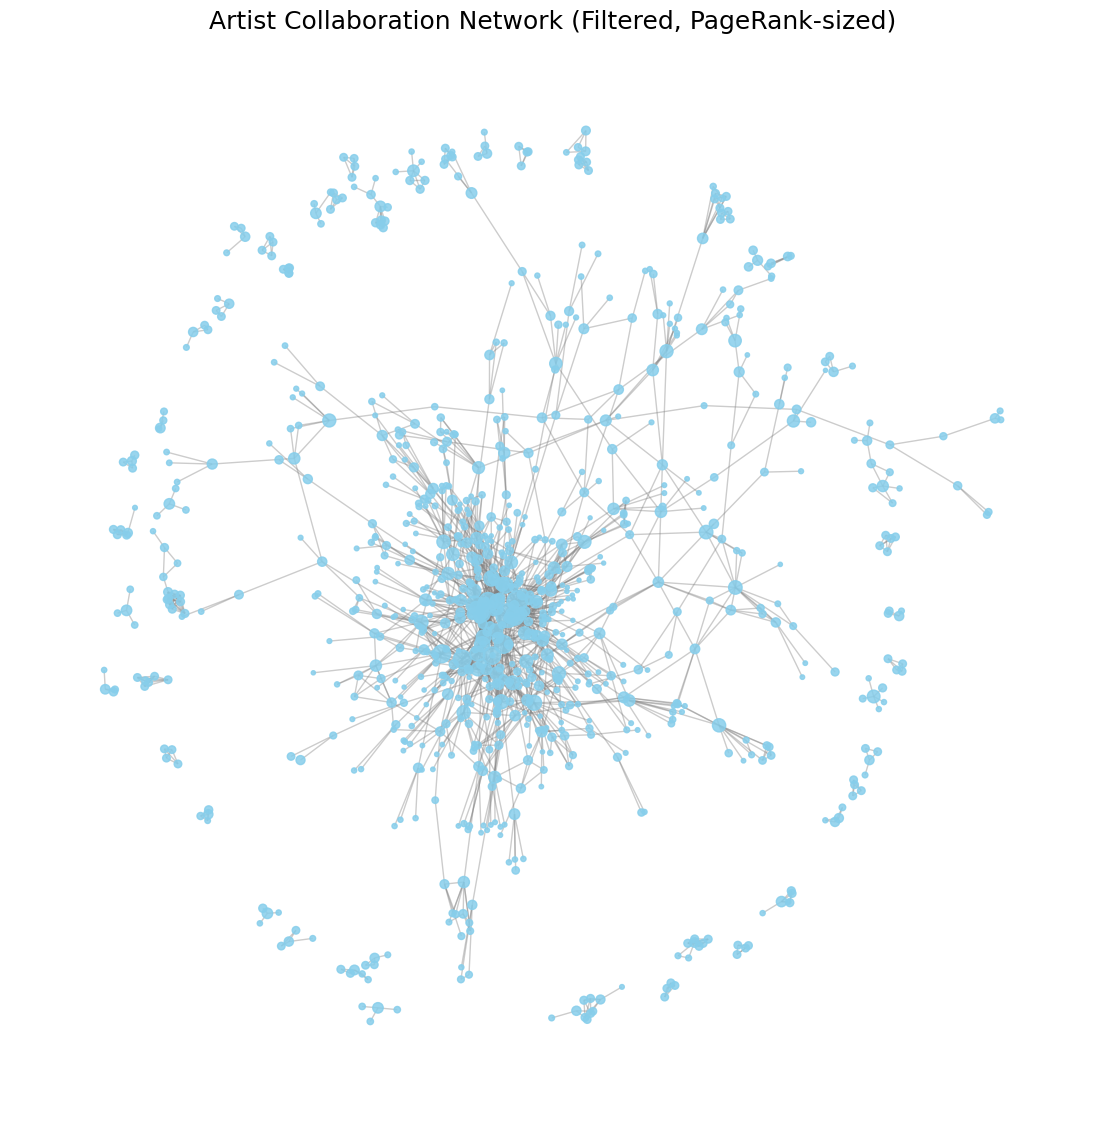

In [72]:
# PARAMETERS
MIN_DEGREE = 2
PR_SCALE = 50000
SEED = 42

# pagerank
pr = nx.pagerank(G, weight="weight")

# filtering periferial
core_nodes = {n for n, d in G.degree() if d > MIN_DEGREE}

plot_nodes = set(core_nodes)
for n in core_nodes:
    plot_nodes.update(G.neighbors(n))


G_plot = G.subgraph(plot_nodes).copy()

node_sizes = [pr[n] * PR_SCALE for n in G_plot.nodes()]

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_plot, seed=SEED)

nx.draw_networkx_nodes(
    G_plot,
    pos,
    node_size=node_sizes,
    node_color="skyblue",
    alpha=0.85
)

nx.draw_networkx_edges(
    G_plot,
    pos,
    edge_color="gray",
    alpha=0.4
)

#nx.draw_networkx_labels(
#    G_plot,
#    pos,
#    {n: G_plot.nodes[n].get("name", n) for n in G_plot.nodes()},
#    font_size=12
#)

plt.title("Artist Collaboration Network (Filtered, PageRank-sized)", fontsize=18)
plt.axis("off")
plt.show()



## Interactive network

In [70]:
from pyvis.network import Network

In [73]:
net = Network(
    notebook=False,      # ← ensures it won't render inline
    height="800px",
    width="100%",
    bgcolor="#222222",
    font_color="white"
)

net.barnes_hut()  # good default layout

for n in G_plot.nodes():
    net.add_node(
        n,
        label=G_plot.nodes[n].get("name", str(n)),
        size=pr[n] * PR_SCALE,
        title=(
            f"<b>{G_plot.nodes[n].get('name', n)}</b><br>"
            f"PageRank: {pr[n]:.4f}<br>"
            f"Degree: {G_expanded.degree(n)}"
        )
    )


for u, v, d in G_plot.edges(data=True):
    net.add_edge(
        u,
        v,
        value=d.get("weight", 1),
        title=f"Collaborations: {d.get('weight', 1)}"
    )

# Optional layout and physics
net.force_atlas_2based()

# Save only — no auto-render
output_path = "music_colabs_graph.html"
net.write_html(output_path)


## Recomendation system

As the collaboration graph is already ocnstructed, it is a great follow up to base our recommendation system on this network.

In [74]:
import random

all_artists = list(G_plot.nodes())

def generate_user(k=3):
    return random.sample(all_artists, k)

users = {
    f"user_{i}": generate_user(2)
    for i in range(1, 6)
}


In [75]:
users

{'user_1': ['2Mu5NfyYm8n5iTomuKAEHl', '2wIVse2owClT7go1WT98tk'],
 'user_2': ['7xAcVHPiirnUqfdqo0USb1', '3YEJ9dU5Oz0LZS2gB2RlNO'],
 'user_3': ['7M8EwIpyu0mZ9oA8sqcsWj', '2LQF8AgyQUgLfquM92Rx8N'],
 'user_4': ['2PJnn4tJWudLd15ps3QbW6', '72cbi5bA8U2sMttAnKIaen'],
 'user_5': ['7i3os1iEWOn5UpaylRiMw5', '4iwJZqoo4TmCIiISdHdhbQ']}

In [97]:
def build_user_subgraph(G, user_artists, recs, hop_neighbors=True):
    nodes = set(user_artists)

    # add neighbors of liked artists
    for a in user_artists:
        if a in G:
            nodes.update(G.neighbors(a))

    # add recommended artists
    rec_nodes = [a for a, _ in recs]
    nodes.update(rec_nodes)

    # optionally add neighbors of recommended artists
    if hop_neighbors:
        for a in rec_nodes:
            nodes.update(G.neighbors(a))

    return G.subgraph(nodes).copy()

In [117]:
def plot_user_recommendation(
    G_sub,
    user_artists,
    recs,
    scores,
    title="User Recommendation Subgraph",
    pr_scale=300000
):
    rec_nodes = {a for a, _ in recs}

    # node colors
    node_colors = []
    for n in G_sub.nodes():
        if n in user_artists:
            node_colors.append("tomato")      # liked
        elif n in rec_nodes:
            node_colors.append("dodgerblue")  # recommended
        else:
            node_colors.append("lightgray")   # context

    # node sizes (score-based)
    node_sizes = [
        scores.get(n, 0) * pr_scale if n in rec_nodes else 300
        for n in G_sub.nodes()
    ]

    pos = nx.spring_layout(G_sub, seed=42)

    plt.figure(figsize=(12, 12))

    nx.draw_networkx_nodes(
        G_sub, pos,
        node_color=node_colors,
        node_size=node_sizes,
        alpha=0.9
    )

    nx.draw_networkx_edges(
        G_sub, pos,
        edge_color="gray",
        alpha=0.4
    )

    # labels only for liked + recommended
    labels = {
        n: G_sub.nodes[n].get("name", n)
        for n in G_sub.nodes()
        if n in user_artists or n in rec_nodes
    }

    nx.draw_networkx_labels(
        G_sub, pos,
        labels,
        font_size=11,
        font_weight="bold"
    )

    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()


### Graph-based, pagerank ranking

In [94]:
def recommend_artists(
    user_artists,
    G,
    pagerank,
    top_n=5
):
    scores = defaultdict(float)

    for a in user_artists:
        if a not in G:
            continue

        for nbr in G.neighbors(a):
            if nbr in user_artists:
                continue

            # score = influence × collaboration strength
            weight = G[a][nbr].get("weight", 1)
            scores[nbr] += pagerank.get(nbr, 0.0) * weight

    # ranked recommendations
    recs = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return recs, dict(scores)



In [95]:
for user, liked in users.items():
    recs, scores = recommend_artists(liked, G, pr)

    print(f"\n{user}")
    print("Liked artists:")
    for a in liked:
        print("  -", G.nodes[a].get("name", a))

    print("Recommended artists:")
    for a, score in recs:
        print(
            "  -",
            G.nodes[a].get("name", a),
            f"(score={score:.4f})"
        )




user_1
Liked artists:
  - Ms. Lauryn Hill
  - Missy Elliott
Recommended artists:
  - Ciara (score=0.0048)
  - Lil' Kim (score=0.0035)
  - Keyshia Cole (score=0.0019)
  - Nas (score=0.0018)
  - Wyclef Jean (score=0.0016)

user_2
Liked artists:
  - Fantasia
  - MDMA
Recommended artists:
  - Missy Elliott (score=0.0017)
  - Lupe Fiasco (score=0.0011)

user_3
Liked artists:
  - Poke and Tone
  - OG Ron C
Recommended artists:
  - Nas (score=0.0018)
  - Jennifer Lopez (score=0.0011)
  - Lloyd (score=0.0006)
  - Cory Rooney (score=0.0004)

user_4
Liked artists:
  - Chyna Whyte
  - Ms. Thing
Recommended artists:
  - Ludacris (score=0.0037)
  - Too $hort (score=0.0010)
  - Beenie Man (score=0.0008)
  - Lil Jon & The East Side Boyz (score=0.0006)
  - Big Kap (score=0.0005)

user_5
Liked artists:
  - Tariq Trotter
  - R.L.
Recommended artists:
  - The Roots (score=0.0010)
  - Eve (score=0.0009)
  - Erykah Badu (score=0.0008)
  - Ginuwine (score=0.0007)
  - Tyrese (score=0.0006)


In [118]:
liked = users['user_1']
recs, scores = recommend_artists(liked, G, pr)

In [119]:
user1_subgraph = build_user_subgraph(G_plot, users['user_1'], recs)

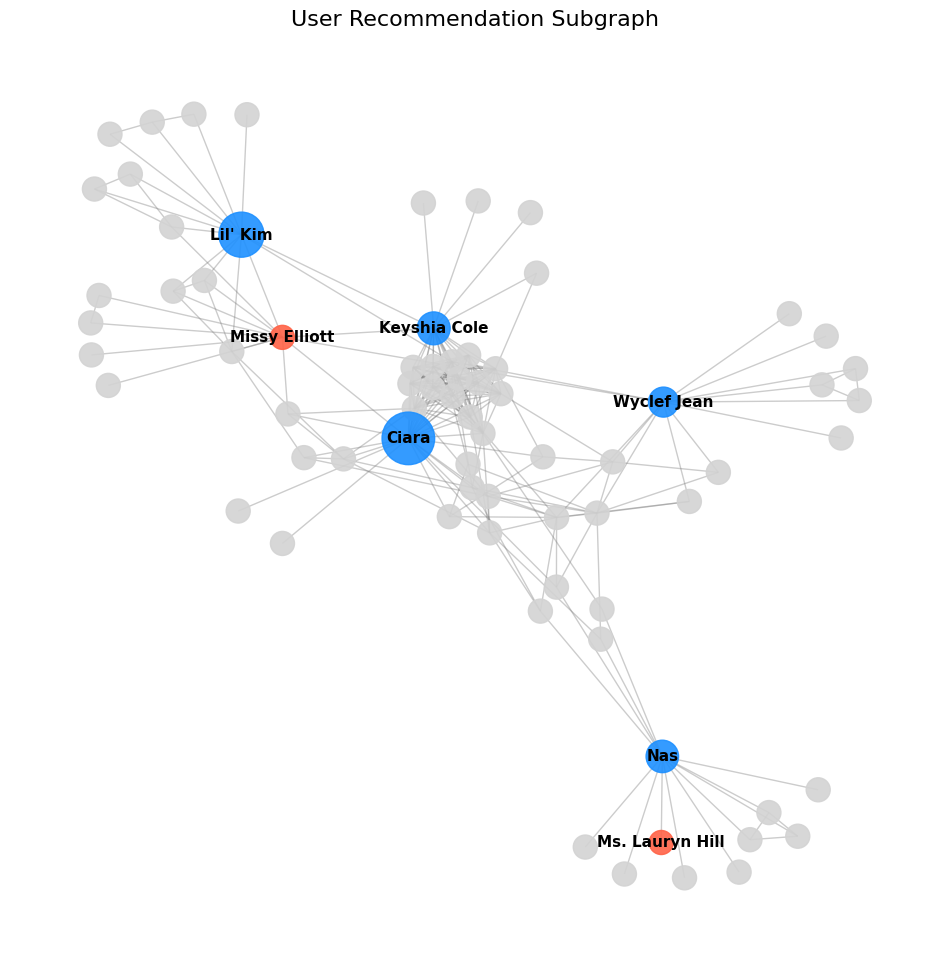

In [120]:
plot_user_recommendation(user1_subgraph, users['user_1'], recs, scores)

### Random walk based

In [121]:
def random_walk_recommend(user_artists, G, alpha=0.85, top_n=5):
    personalization = {n: 0.0 for n in G.nodes()}
    for a in user_artists:
        if a in personalization:
            personalization[a] = 1.0

    pr_user = nx.pagerank(
        G,
        alpha=alpha,
        personalization=personalization,
        weight="weight"
    )

    for a in user_artists:
        pr_user.pop(a, None)

    ranked = sorted(pr_user.items(), key=lambda x: x[1], reverse=True)
    return ranked[:top_n], pr_user


In [122]:
for user, liked in users.items():
    recs, scores = random_walk_recommend(liked, G)

    print(f"\n{user}")
    print("Liked artists:")
    for a in liked:
        print("  -", G.nodes[a].get("name", a))

    print("Recommended artists:")
    for a, score in recs:
        print(
            "  -",
            G.nodes[a].get("name", a),
            f"(score={score:.4f})"
        )


user_1
Liked artists:
  - Ms. Lauryn Hill
  - Missy Elliott
Recommended artists:
  - Nas (score=0.1070)
  - Lil' Kim (score=0.0233)
  - Ciara (score=0.0196)
  - Jennifer Lopez (score=0.0159)
  - Da Brat (score=0.0142)

user_2
Liked artists:
  - Fantasia
  - MDMA
Recommended artists:
  - Lupe Fiasco (score=0.1526)
  - Missy Elliott (score=0.0899)
  - Kanye West (score=0.0360)
  - Guy Sebastian (score=0.0259)
  - Skylar Grey (score=0.0259)

user_3
Liked artists:
  - Poke and Tone
  - OG Ron C
Recommended artists:
  - Lloyd (score=0.0843)
  - Nas (score=0.0607)
  - Lil Wayne (score=0.0463)
  - Jennifer Lopez (score=0.0453)
  - Cory Rooney (score=0.0346)

user_4
Liked artists:
  - Chyna Whyte
  - Ms. Thing
Recommended artists:
  - Beenie Man (score=0.1498)
  - Janet Jackson (score=0.0491)
  - Ludacris (score=0.0462)
  - Mya (score=0.0424)
  - Too $hort (score=0.0394)

user_5
Liked artists:
  - Tariq Trotter
  - R.L.
Recommended artists:
  - The Roots (score=0.0577)
  - Erykah Badu (score=

In [123]:
liked = users['user_1']
recs, scores = random_walk_recommend(liked, G)
user1_subgraph = build_user_subgraph(G_plot, users['user_1'], recs)

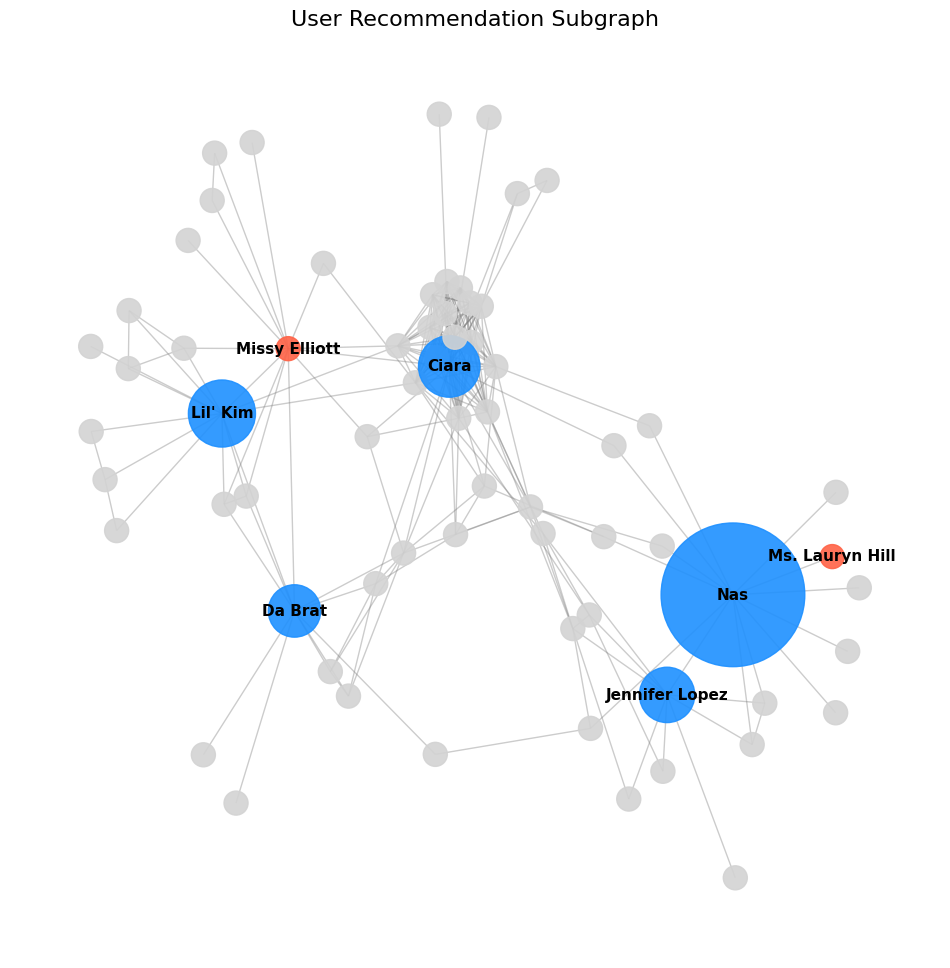

In [126]:
plot_user_recommendation(user1_subgraph, users['user_1'], recs, scores, pr_scale=100000)